## 1. Ejercicio:

Realizar la planificación y modelado de una simulacion basado en eventos discretos para identificar los contagios dentro de un establecimiento de estudiantes post COVID-19 para el reingreso de clases. Los pasos para el regreso progresivo a clases se describe a continuación:

1. Calcular e Identificar el aforo máximo permitido en la institución educativa.
2. Identificar el número de estudiantes y el porcentaje de contagio dentro del contexto poblacional el mismo que se aplicara dentro de la simulación por el contagio.
3. Generar la simulación desde la puerta de ingreso y la salida del plantel por día.
4. Los estudiantes hacen fila para ingresar al establecimiento y no pueden superar el aforo permitido.
5. Realizar con un tiempo de un 1 mes.
         
Generar graficas que indiquen los estudiantes que presentaron complicaciones y el total de estudiantes por establecimiento en cada día o semana.

**Nota**: No tomar datos de transporte, numero de aulas, personal docente, etc. Solo se el ingreso, salida y el contagio dentro del establecimiento.

In [49]:
import simpy
import random

In [50]:
JORNADA = 24
SEMANAS = 4
contagiados = {}
AFORO_MAXIMO = 200
TIEMPO_INGRESO = 3
TIEMPO_JORNADA = JORNADA * 60
TIEMPO_SIMULACION = SEMANAS * 7 * 24 * 60

In [51]:
class Colegio(object):
    
    def __init__(self, env):
        
        self.env = env
        self.action = env.process(self.run())
        
    def run(self):
        
        while True:
            
            print("Llegan los estudiantes al colegio en el tiempo %d" % self.env.now)
            jornada_tiempo = TIEMPO_JORNADA
            
            try:
                print("Aforo máximo esperado de " + str(AFORO_MAXIMO) + " estudiantes")
                estudiantes = random.randint(195, 250)
                print(str(estudiantes) + " estudiantes tratando de ingresar al colegio")
                if estudiantes > AFORO_MAXIMO:
                    estudiantes_eliminados = -200 + estudiantes
                    print("Se les ha impedido el ingreso a " + str(estudiantes_eliminados) + " estudiantes")
                    yield self.env.process(self.estudiando(jornada_tiempo))
                
            except simpy.Interrupt:
                print("Aforo máximo alcanzado, ingreso interrumpido. Se espera que termine la jornada de estudio...")
            
            print("Se abre las puertas del colegio una vez terminada la jornada de estudio en el tiempo %d" % self.env.now)
            yield self.env.timeout(TIEMPO_INGRESO)
    
    def estudiando(self, duration):

        jornada = self.env.now
        self.contagio(jornada)
        yield self.env.timeout(duration)
        colegio.action.interrupt()
        
    def contagio(self, jornada):
        
        positivos = 0

        for i in range(1,201):

            # 0 no infectado - 1 infectado
            infeccion = random.randint(0,1)

            # acumulados de positivos y negativos
            if infeccion == 1:
                positivos += + 1
                
        contagiados[jornada] = positivos

In [52]:
env = simpy.Environment()
colegio = Colegio(env)
env.run(until=TIEMPO_SIMULACION)

Llegan los estudiantes al colegio en el tiempo 0
Aforo máximo esperado de 200 estudiantes
213 estudiantes tratando de ingresar al colegio
Se les ha impedido el ingreso a 13 estudiantes
Aforo máximo alcanzado, ingreso interrumpido. Se espera que termine la jornada de estudio...
Se abre las puertas del colegio una vez terminada la jornada de estudio en el tiempo 1440
Llegan los estudiantes al colegio en el tiempo 1443
Aforo máximo esperado de 200 estudiantes
214 estudiantes tratando de ingresar al colegio
Se les ha impedido el ingreso a 14 estudiantes
Aforo máximo alcanzado, ingreso interrumpido. Se espera que termine la jornada de estudio...
Se abre las puertas del colegio una vez terminada la jornada de estudio en el tiempo 2883
Llegan los estudiantes al colegio en el tiempo 2886
Aforo máximo esperado de 200 estudiantes
222 estudiantes tratando de ingresar al colegio
Se les ha impedido el ingreso a 22 estudiantes
Aforo máximo alcanzado, ingreso interrumpido. Se espera que termine la jo

In [53]:
index = 1
registro_covid = {}
for positivos in contagiados.values():
    registro_covid["Jornada_"+str(index)] = positivos
    index += 1

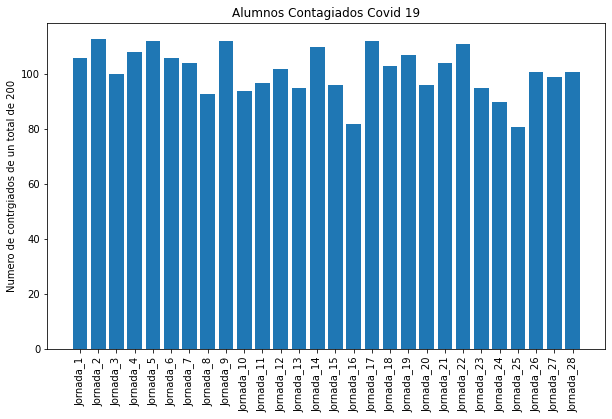

In [68]:
import matplotlib.pyplot as plt
 
eje_x = list(registro_covid.keys())
eje_y = list(registro_covid.values())

fig, ax = plt.subplots(figsize = (10,6))
plt.bar(eje_x, eje_y)
plt.xticks(rotation=90)
plt.ylabel('Numero de contrgiados de un total de 200')
plt.title('Alumnos Contagiados Covid 19')
plt.show()

In [80]:
total = len(registro_covid) * 200
positivos = sum(registro_covid.values())

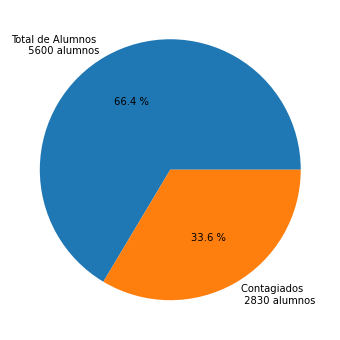

In [86]:
valores = [total, positivos]
nombres = ["Total de Alumnos \n " + str(total) + " alumnos","Contagiados \n " + str(positivos) + " alumnos"]
fig, ax = plt.subplots(figsize = (10,6))
plt.pie(valores, labels=nombres, autopct="%0.1f %%")
plt.show()